<a href="https://colab.research.google.com/github/eridanletalis/probability_and_statistics/blob/master/prob_hw_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.



In [3]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype=np.float64)
ks = np.array( [401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype=np.float64)
b = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp) ** 2)
a = np.mean(ks) - b * np.mean(zp)
print(f"Уравнение линейной регрессии: y = {a:.4f} + {b:.4f}*x")

Уравнение линейной регрессии: y = 444.1774 + 2.6205*x


In [4]:
from numpy.linalg import inv

X = zp.reshape((len(zp), 1))
y = ks.reshape((len(ks), 1))
B = inv(X.T@X)@X.T@y # (np.dot(inv(np.dot(X.T, X)), X.T))@y
print(f"Линейное урванение без коэффициента пересечения с OY: y = {B[0,0]:.4f}x")

Линейное урванение без коэффициента пересечения с OY: y = 5.8898x


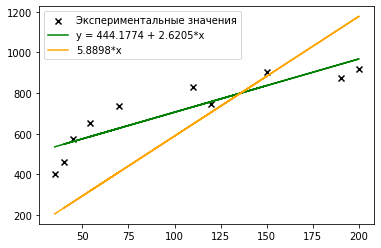

In [5]:
plt.scatter(zp, ks, marker='x', color='black', label='Экспериментальные значения')
plt.plot(zp, (a + b*zp), color='green', label=f'y = {a:.4f} + {b:.4f}*x')
plt.plot(zp, (B[0,0]*zp), color='orange', label=f'{B[0,0]:.4f}*x')
plt.legend()
plt.show()

In [7]:
# С дополнительной единицей в матрице признаков
X = zp.reshape((len(zp), 1))
y = ks.reshape((len(ks), 1))
X = np.hstack([np.ones((len(zp), 1)), X])
X

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [8]:
B = inv(X.T@X)@X.T@y 
B

# Значения идентичны значениям выше

array([[444.17735732],
       [  2.62053888]])

In [11]:
# Проверим в sklearn
import sklearn.linear_model as lm
a = zp.copy().reshape(-1, 1)
b = ks.copy()
skm = lm.LinearRegression()
skm.fit(a, b)
print (skm.intercept_, skm.coef_)

444.1773573243595 [2.62053888]


Резульат также идентичен

Проверяем остатки

In [25]:
X_new = zp.copy()
Y_pred = skm.intercept_ + skm.coef_*zp
Y_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [22]:
X_new 

array([ 35.,  45., 190., 200.,  40.,  70.,  54., 150., 120., 110.])

In [24]:
zp

array([ 35.,  45., 190., 200.,  40.,  70.,  54., 150., 120., 110.])

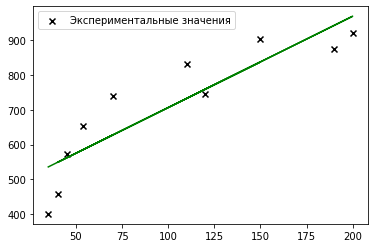

In [27]:
plt.scatter(zp, ks, marker='x', color='black', label='Экспериментальные значения')
plt.plot(zp, Y_pred, color='green')
# plt.plot(zp, (B[0,0]*zp), color='orange', label=f'{B[0,0]:.4f}*x')
plt.legend()
plt.show()

In [28]:
res = Y_pred - ks
res

array([ 134.89621821,  -11.89839297,   68.07974498,   49.2851338 ,
         89.99891262, -111.38492091,  -67.31354303,  -64.74181032,
         12.64202321,  -99.56336561])

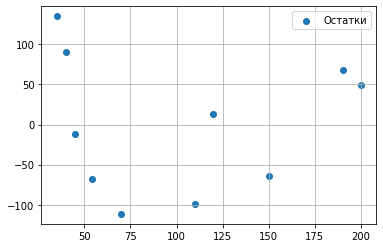

In [30]:
plt.scatter(zp, res, label='Остатки')
plt.grid()
plt.legend()
plt.show()

In [33]:
import scipy.stats as stats
stats.shapiro(res)

ShapiroResult(statistic=0.9479535818099976, pvalue=0.6443547606468201)

По графику можно судить о том, что остатки распределены хаотично, т.е. модель гомоскедастично.
Тестировалось распределение остатков на нормальность. pvalue больше 0.05, следовательно можно принять гипотезу о том, что остатки распределены равномерно.

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).



In [13]:
def mse_(B1, y=ks, X=zp, n=len(zp)):
    return np.sum((B1*X - y)**2)/n

eps = 1e-5
B1 = 1
alpha = 0.00001
maxiter = 1e+5
iterno = 0
lastmse = 1e+12
while maxiter > iterno:
    
    B1 -= alpha*(2/len(zp)) * np.sum((B1*zp - ks)* zp)
    lost = mse_(B1)
    if iterno%10 == 0:
        print(f"Коэффициент {B1} при MSE = {lost} на итериации {iterno}")
    
    if np.abs(lost - lastmse) < eps:
        break
    lastmse = lost
    iterno += 1

print(f"Коэффициент линейной регрессии, посчитанный методом наименьших квадратов, равен {B1:.4f}")

Коэффициент 2.347302 при MSE = 229405.42884192182 на итериации 0
Коэффициент 5.748727835228332 при MSE = 56791.110810876475 на итериации 10
Коэффициент 5.884200938409783 при MSE = 56517.293461113455 на итериации 20
Коэффициент 5.889596605572516 при MSE = 56516.859105830044 на итериации 30
Коэффициент линейной регрессии, посчитанный методом наименьших квадратов, равен 5.8898


3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [16]:
X = zp.copy()
y = ks.copy()

def mse2_(b0, b1, y=y, X=X, n=len(zp)):
    return np.sum((b0 + b1*X - y)**2)/n

eps = 1e-4
b0 = 0.1
b1 = 0.1
alpha = 0.00001
maxiter = 1e+6
iterno = 0
lastmse = 1e+12
while maxiter > iterno:
    y_ = b0 + b1 * X
    b0 -= alpha * 10 * (2/len(X)) * np.sum((y_ - y)) # Множитель 10 у скорости изменения свободного коэффициента
    # Если сильно уменьшить (до 1е-5) альфа, без этого множителя программа ведёт себя не правильно - коэффициенты растут
    # С этим коэффициентом достигается сходимость на итерации 106810
    # Коэффициенты b0=442.20546084743114 b1=2.635055316495254 при MSE = 6471.400545751201 на итериации 106810
    b1 -= alpha * (2/len(X)) * np.sum((y_ - y) * X)
    lost = mse2_(b0, b1)
    if iterno%10000 == 0:
        print(f"Коэффициенты b0={b0} b1={b1} при MSE = {lost} на итериации {iterno}")
    
    if np.abs(lost - lastmse) < eps:
        break
    lastmse = lost
    iterno += 1

print(f"Уравнение имеет вид y = {b0:.4f} + {b1:.4f}*x")

Коэффициенты b0=0.23993199999999998 b1=1.6950780000000003 при MSE = 298669.91957656574 на итериации 0
Коэффициенты b0=176.99793823155434 b1=4.5874232870909015 при MSE = 24578.24552869998 на итериации 10000
Коэффициенты b0=283.2661860212592 b1=3.8051124339540343 при MSE = 13038.409454267963 на итериации 20000
Коэффициенты b0=347.26717936958835 b1=3.3339587944678577 при MSE = 8852.729392011368 на итериации 30000
Коэффициенты b0=385.81234440965807 b1=3.050202342526814 при MSE = 7334.517393975145 на итериации 40000
Коэффициенты b0=409.0265114129715 b1=2.879307506383829 при MSE = 6783.838021281238 на итериации 50000
Коэффициенты b0=423.00744907655417 b1=2.776384577863402 при MSE = 6584.097950788569 на итериации 60000
Коэффициенты b0=431.4275926003403 b1=2.7143983326712977 при MSE = 6511.649085371195 на итериации 70000
Коэффициенты b0=436.4986986067572 b1=2.6770665675510315 при MSE = 6485.3707422860225 на итериации 80000
Коэффициенты b0=439.5528171090929 b1=2.6545831813953518 при MSE = 6475.

В обоих вариантах видим, что коэффициенты схожи с коэффициентами, которые найдены по формулам
